# 第3章 : 多次元正規分布

## NumPyの多次元配列

In [1]:
import numpy as np

x = np.array([1, 2, 3])

print(x.__class__) # クラス名
print(x.shape) # 形状
print(x.ndim) # 次元数

<class 'numpy.ndarray'>
(3,)
1


In [2]:
W = np.array([[1, 2, 3], [4, 5, 6]])

print(W.ndim)
print(W.shape)

2
(2, 3)


### 要素ごとの演算

In [3]:
X = np.array([[0, 1, 2], [3, 4, 5]])

print(W + X)
print('---')
print(W * X)

[[ 1  3  5]
 [ 7  9 11]]
---
[[ 0  2  6]
 [12 20 30]]


### ベクトルの内積と行列積

In [4]:
# ベクトルの内積
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
y = np.dot(a, b)
print(y)

# 行列の積
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
Y = np.dot(A, B)
print(Y)

32
[[19 22]
 [43 50]]


In [7]:
print(a @ b) # np.dot(a,b)と同じ
print(A @ B) # np.dot(A,B)と同じ

32
[[19 22]
 [43 50]]


## 多次元正規分布
$D$次元の確率変数$\boldsymbol{x} \in \mathbb{R}^D$に対して、多次元正規分布は
$$
\mathcal{N}\left(\boldsymbol{x};\boldsymbol{\mu},\boldsymbol{\Sigma}\right) = \frac{1}{\sqrt{\left(2\pi\right)^D\|\boldsymbol{\Sigma}\|}}\exp \{-\frac{1}{2}\left(\boldsymbol{x} - \boldsymbol{\mu} \right)^{\top} \boldsymbol{\Sigma}^{-1}\left(\boldsymbol{x} - \boldsymbol{\mu}\right)\}
$$
とかける

ここで、$\boldsymbol{\mu}$は平均ベクトル、$\boldsymbol{\Sigma}$は共分散行列である。平均ベクトルは各次元の平均である。共分散行列は、その対角成分$\sigma_{ii}$は各次元の分散を表し、$\sigma_{ij}$は共分散を表す。
$x_i$と$x_j$の共分散${\rm{Cov}}[x_i, x_j]$は
$$
{\rm{Cov}[x_i, x_j]} = \mathbb{E}[\left(x_i - \mu_i \right)\left(x_j - \mu_j \right)]
$$
で定まる。ここで、$i=j$を考えると分散の式と一致することから共分散は分散の一般化とみなせる

### 転置(Transpose)

In [8]:
import numpy as np

A = np.array([[1, 2, 3], [4, 5, 6]])
print(A)
print('---')
print(A.T)

[[1 2 3]
 [4 5 6]]
---
[[1 4]
 [2 5]
 [3 6]]


### 行列式(Determinant)

In [9]:
A = np.array([[3, 4], [5, 6]])
d = np.linalg.det(A)
print(d)

-1.9999999999999971


### 逆行列(Inverse Matrix)

In [10]:
A = np.array([[3, 4], [5, 6]])
B = np.linalg.inv(A)

print(B)
print('---')
print(A @ B)

[[-3.   2. ]
 [ 2.5 -1.5]]
---
[[ 1.0000000e+00 -8.8817842e-16]
 [ 0.0000000e+00  1.0000000e+00]]


### 多次元正規分布実装

In [11]:
def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    D = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** D * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y

## 2次元正規分布の可視化
### 3Dグラフの描画方法

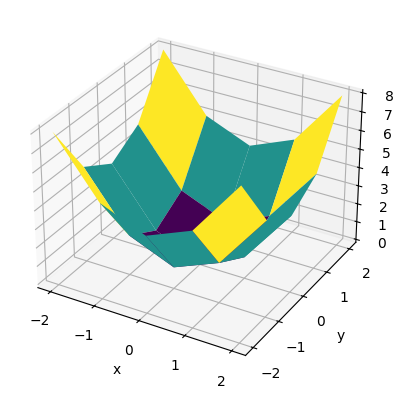

In [12]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2]])
Y = np.array([[-2, -2, -2, -2, -2],
              [-1, -1, -1, -1, -1],
              [0, 0, 0, 0, 0],
              [1, 1, 1, 1, 1],
              [2, 2, 2, 2, 2]])

Z = X ** 2 + Y ** 2

ax = plt.axes(projection='3d') # 3d用グラフ指定
ax.plot_surface(X, Y, Z, cmap='viridis') # viridisというカラーマップを使用
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

`meshgrid(x, y)`を使って、要素数Dの配列x,yからそれぞれD*Dの2次元配列を作成できる(D * D種類の全ての点をかんたんに作れる)

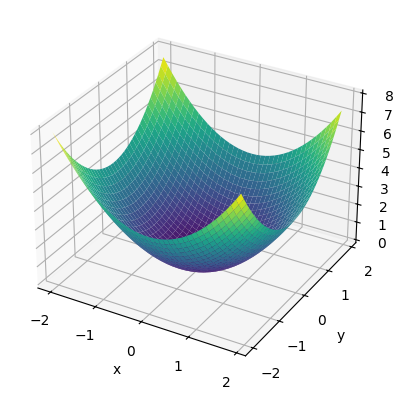

In [13]:
xs = np.arange(-2, 2, 0.1)
ys = np.arange(-2, 2, 0.1)

X, Y = np.meshgrid(xs, ys)
Z = X ** 2 + Y ** 2

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

### 等高線の描画
`contour()`を使って等高線を描画できる

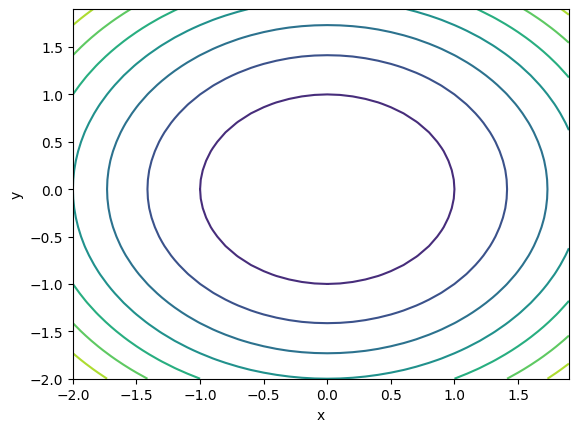

In [14]:
x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)

X, Y = np.meshgrid(x, y)
Z = X ** 2 + Y ** 2

ax = plt.axes()
ax.contour(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

### 2次元正規分布のグラフ

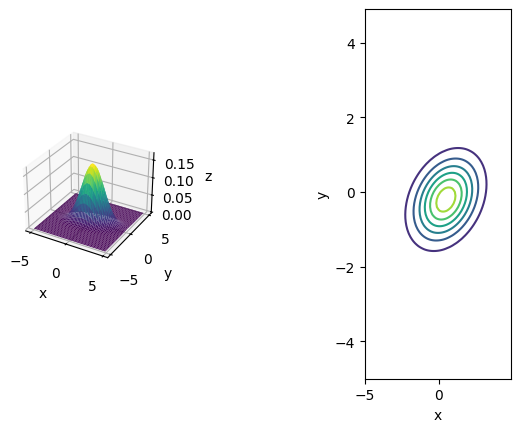

In [20]:
mu = np.array([0.5, -0.2])
cov = np.array([[2.0, 0.3], [0.3, 0.5]])
xs = ys = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)

# 曲面
fig = plt.figure()
ax1 = fig.add_subplot(1, 3, 1, projection='3d') # キャンバスを1行3列に分割してその1個目を使用
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')

# 等高線
ax2 = fig.add_subplot(1, 3, 3) # キャンバスを1行3列に分割してその3個目を使用
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.contour(X, Y, Z)
plt.show()

## 多次元正規分布の最尤推定

$L\left(\boldsymbol{\mu}, \boldsymbol{\Sigma} \right) = \log p\left(\mathcal{D};\boldsymbol{\mu}, \boldsymbol{\Sigma}\right) = \prod_{n=1}^{N}\mathcal{N}\left(\boldsymbol{x}^{\left(n\right)} ; \boldsymbol{\mu}, \boldsymbol{\Sigma}\right)$ に対して最尤推定をおこない、
$$
\begin{align}
\frac{\partial L}{\partial \boldsymbol{\mu}} &= \boldsymbol{0} \\
\frac{\partial L}{\partial \boldsymbol{\Sigma}} &= \boldsymbol{0}
\end{align}
$$
を解くと
$$
\begin{align}
\hat{\boldsymbol{\mu}} &= \frac{1}{N}\sum_{n=1}^{N}{\boldsymbol{x}^{\left(n\right)}} \\
\hat{\boldsymbol{\Sigma}} &= \frac{1}{N}\sum_{n=1}^{N}{\left(\boldsymbol{x}^{\left(n\right)} - \hat{\boldsymbol{\mu}}\right)\left(\boldsymbol{x}^{\left(n\right)} - \hat{\boldsymbol{\mu}}\right)^{\top}}
\end{align}
$$
を得る

### 最尤推定の実装

In [22]:
import numpy as np

np.random.seed(0)

N = 10000
D = 2
xs = np.random.rand(N, D) # 一様分布からのダミーデータ

mu = np.sum(xs, axis=0)
mu /= N

cov = 0

for n in range(N):
    x = xs[n]
    z = x - mu
    z = z[:, np.newaxis] # (D,) -> (D, 1) に変換
    cov += z @ z.T

cov /= N

print(mu)
print(cov)

[0.49443495 0.49726356]
[[ 0.08476319 -0.00023128]
 [-0.00023128  0.08394656]]


上記のコードは平均と分散を自力で計算しているが、以下のように求めることもできる

In [23]:
mu = np.mean(xs, axis=0)
cov = np.cov(xs, rowvar=False)

### 実データ使用

In [24]:
path = 'height_weight.txt'
xs = np.loadtxt(path)

print(xs.shape)

(25000, 2)


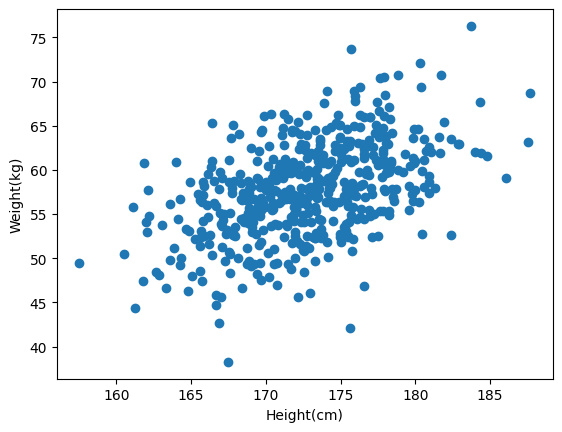

In [25]:
small_xs = xs[:500]
plt.scatter(small_xs[:, 0], small_xs[:, 1])
plt.xlabel('Height(cm)')
plt.ylabel('Weight(kg)')
plt.show()

### 最尤推定
平均と分散を求める

In [26]:
mu = np.mean(xs, axis=0)
cov = np.cov(xs, rowvar=False)

### 結果を描画

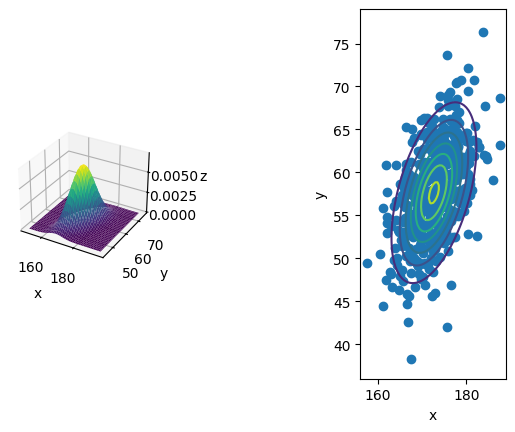

In [29]:
X, Y = np.meshgrid(np.arange(150, 195, 0.5),
                   np.arange(45, 75, 0.5))
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)

fig = plt.figure()
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(1, 3, 3)
ax2.scatter(small_xs[:,0], small_xs[:,1])
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_xlim(156, 189)
ax2.set_ylim(36, 79)
ax2.contour(X, Y, Z)
plt.show()